In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a local file after downloading it
# Data From https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
df = pd.read_csv("data/marketing_campaign.csv",sep='\t')
df['dt'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df.head().T

C:\Users\yehtu\AppData\Local\Temp\ipykernel_14344\2811282536.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dt'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')


0                    1  \
ID                                  5524                 2174   
Year_Birth                          1957                 1954   
Education                     Graduation           Graduation   
Marital_Status                    Single               Single   
Income                           58138.0              46344.0   
Kidhome                                0                    1   
Teenhome                               0                    1   
Dt_Customer                   04-09-2012           08-03-2014   
Recency                               58                   38   
MntWines                             635                   11   
MntFruits                             88                    1   
MntMeatProducts                      546                    6   
MntFishProducts                      172                    2   
MntSweetProducts                      88                    1   
MntGoldProds                          88                    6   
NumDealsPurchases                      3                    2   
NumWebPurchases                        8                    1   
NumCatalogPurchases                   10                    1   
NumStorePurchases                      4                    2   
NumWebVisitsMonth                      7                    5   
AcceptedCmp3                           0                    0   
AcceptedCmp4                           0                    0   
AcceptedCmp5                           0                    0   
AcceptedCmp1                           0                    0   
AcceptedCmp2                           0                    0   
Complain                               0                    0   
Z_CostContact                          3                    3   
Z_Revenue                             11                   11   
Response                               1                    0   
dt                   2012-04-09 00:00:00  2014-08-03 00:00:00   

                                       2                    3  \
ID                                  4141                 6182   
Year_Birth                          1965                 1984   
Education                     Graduation           Graduation   
Marital_Status                  Together             Together   
Income                           71613.0              26646.0   
Kidhome                                0                    1   
Teenhome                               0                    0   
Dt_Customer                   21-08-2013           10-02-2014   
Recency                               26                   26   
MntWines                             426                   11   
MntFruits                             49                    4   
MntMeatProducts                      127                   20   
MntFishProducts                      111                   10   
MntSweetProducts                      21                    3   
MntGoldProds                          42                    5   
NumDealsPurchases                      1                    2   
NumWebPurchases                        8                    2   
NumCatalogPurchases                    2                    0   
NumStorePurchases                     10                    4   
NumWebVisitsMonth                      4                    6   
AcceptedCmp3                           0                    0   
AcceptedCmp4                           0                    0   
AcceptedCmp5                           0                    0   
AcceptedCmp1                           0                    0   
AcceptedCmp2                           0                    0   
Complain                               0                    0   
Z_CostContact                          3                    3   
Z_Revenue                             11                   11   
Response                               0                    0   
dt                   2013-08-21 00:00:00  2014-10-02 00:00:00   

       

In [2]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

#### People

    * ID: Customer's unique identifier
    * Year_Birth: Customer's birth year
    * Education: Customer's education level
    * Marital_Status: Customer's marital status
    * Income: Customer's yearly household income
    * Kidhome: Number of children in customer's household
    * Teenhome: Number of teenagers in customer's household
    * Dt_Customer: Date of customer's enrollment with the company
    * Recency: Number of days since customer's last purchase
    * Complain: 1 if the customer complained in the last 2 years, 0 otherwise


#### Products
    * MntWines: Amount spent on wine in last 2 years
    * MntFruits: Amount spent on fruits in last 2 years
    * MntMeatProducts: Amount spent on meat in last 2 years
    * MntFishProducts: Amount spent on fish in last 2 years
    * MntSweetProducts: Amount spent on sweets in last 2 years
    * MntGoldProds: Amount spent on gold in last 2 years


#### Promotion
    * NumDealsPurchases: Number of purchases made with a discount
    * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    * Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
    * NumWebPurchases: Number of purchases made through the company’s website
    * NumCatalogPurchases: Number of purchases made using a catalogue
    * NumStorePurchases: Number of purchases made directly in stores
    * NumWebVisitsMonth: Number of visits to company’s website in the last month

In [3]:
def pipeline(fp):
    df = pd.read_csv(fp, sep='\t')

    # Drop NAs
    df = df.dropna()

    # Compute age.
    df['age'] = 2024 - df['Year_Birth']

    # Remove one super rich person.
    df = df[df['Income'] < 600000]

    df.columns = [x.lower() for x in df.columns]

    # only 200 duplicates, so just drop them. 
    df = df.drop_duplicates()


    # make column of total spent
    product_columns = [
        'mntwines', 'mntfruits', 'mntmeatproducts', 
        'mntfishproducts', 'mntsweetproducts', 'mntgoldprods'
        ]
    
    df['total_spent'] = df[product_columns].sum(axis=1)


    return df

fp = 'data/marketing_campaign.csv'
df = pipeline(fp)




In [4]:
print(df.shape)
print(df.isnull().sum())

print('\n\n % of column that is null')
print(df.isnull().sum()/len(df))


# ## LESS THAN 1% of 1 important column.  JUST DROP THE NULLs 
df = df.dropna()


(2215, 31)
id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
z_costcontact          0
z_revenue              0
response               0
age                    0
total_spent            0
dtype: int64


 % of column that is null
id                     0.0
year_birth             0.0
education              0.0
marital_status         0.0
income                 0.0
kidhome                0.0
teenhome   

<Axes: >

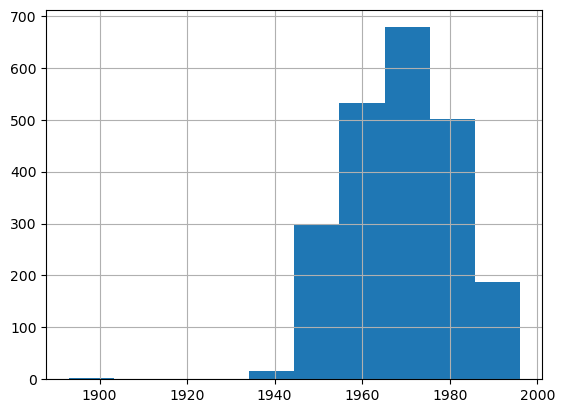

In [5]:
# FIND OUTLIERS... 
df = pipeline(fp)


df['age'] = 2024 - df['year_birth']

# df.income.hist(bins=30)
# df.income.describe()
# df.plot(kind='scatter', x='age', y='income', alpha=0.1)

df['year_birth'].hist()



In [6]:
# THIS IS USELESS
# sns.pairplot(df)

print(df.columns)

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'total_spent'],
      dtype='object')


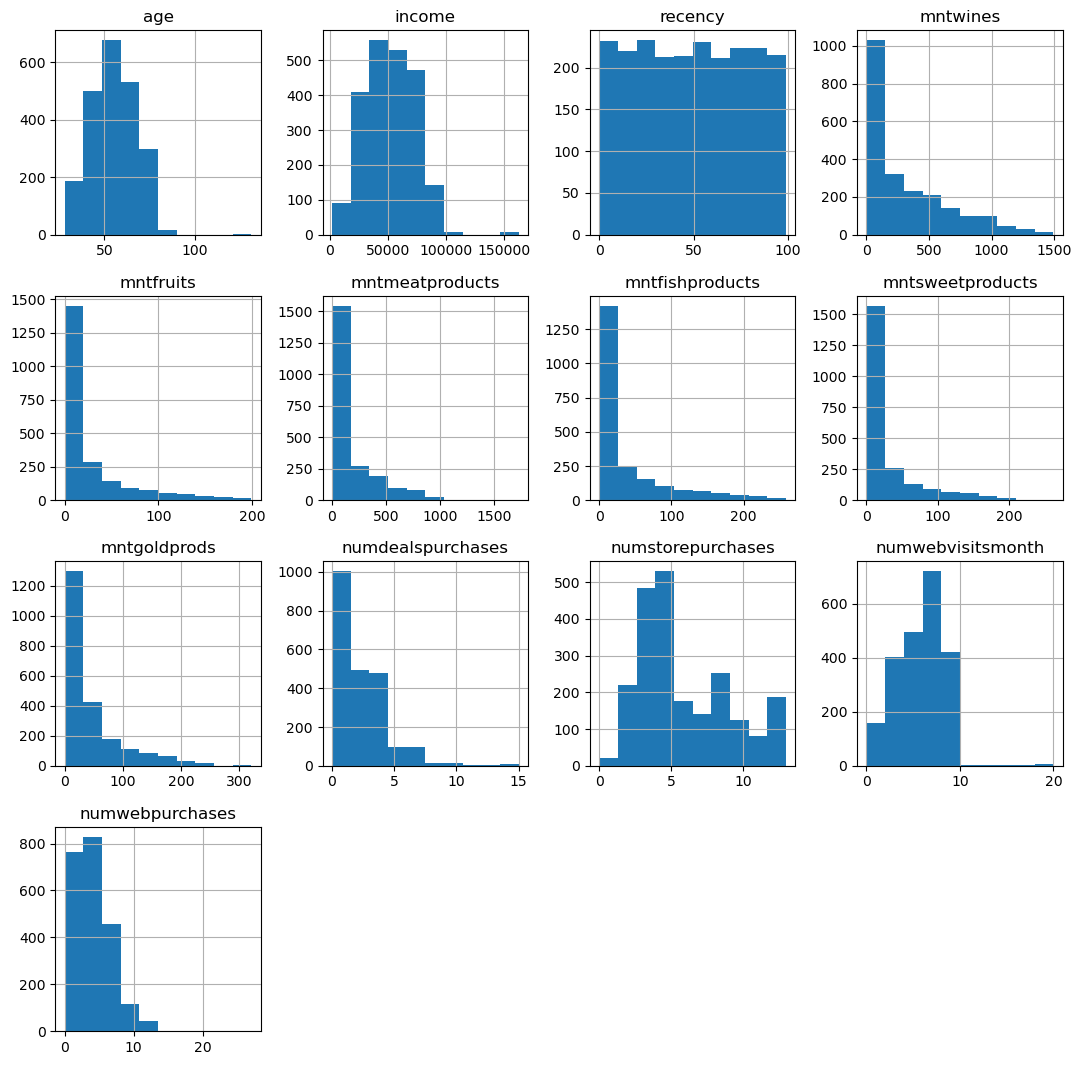

In [7]:
df = pipeline(fp)
cols_of_interest = ['age', 'income', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 
       'numstorepurchases', 'numwebvisitsmonth','numwebpurchases'] 

df[cols_of_interest].hist(figsize=(13,13))
df_interests = df[cols_of_interest].copy()

In [8]:
df[cols_of_interest].describe().round().T

count     mean      std     min      25%      50%  \
age                2215.0     55.0     12.0    28.0     47.0     54.0   
income             2215.0  51970.0  21526.0  1730.0  35284.0  51373.0   
recency            2215.0     49.0     29.0     0.0     24.0     49.0   
mntwines           2215.0    305.0    337.0     0.0     24.0    175.0   
mntfruits          2215.0     26.0     40.0     0.0      2.0      8.0   
mntmeatproducts    2215.0    167.0    224.0     0.0     16.0     68.0   
mntfishproducts    2215.0     38.0     55.0     0.0      3.0     12.0   
mntsweetproducts   2215.0     27.0     41.0     0.0      1.0      8.0   
mntgoldprods       2215.0     44.0     52.0     0.0      9.0     25.0   
numdealspurchases  2215.0      2.0      2.0     0.0      1.0      2.0   
numstorepurchases  2215.0      6.0      3.0     0.0      3.0      5.0   
numwebvisitsmonth  2215.0      5.0      2.0     0.0      3.0      6.0   
numwebpurchases    2215.0      4.0      3.0     0.0      2.0      4.0   

                       75%       max  
age                   65.0     131.0  
income             68487.0  162397.0  
recency               74.0      99.0  
mntwines             505.0    1493.0  
mntfruits             33.0     199.0  
mntmeatproducts      232.0    1725.0  
mntfishproducts       50.0     259.0  
mntsweetproducts      33.0     262.0  
mntgoldprods          56.0     321.0  
numdealspurchases      3.0      15.0  
numstorepurchases      8.0      13.0  
numwebvisitsmonth      7.0      20.0  
numwebpurchases        6.0      27.0

In [9]:
product_columns = ['mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods']

df['total_spent'] = df[product_columns].sum(axis=1)
df.describe().T

count          mean           std     min      25%  \
id                   2215.0   5586.618059   3249.082838     0.0   2814.5   
year_birth           2215.0   1968.816704     11.987000  1893.0   1959.0   
income               2215.0  51969.861400  21526.320095  1730.0  35284.0   
kidhome              2215.0      0.441535      0.536886     0.0      0.0   
teenhome             2215.0      0.505643      0.544198     0.0      0.0   
recency              2215.0     49.024379     28.949608     0.0     24.0   
mntwines             2215.0    305.225282    337.345380     0.0     24.0   
mntfruits            2215.0     26.361625     39.802036     0.0      2.0   
mntmeatproducts      2215.0    167.063205    224.311559     0.0     16.0   
mntfishproducts      2215.0     37.651016     54.760822     0.0      3.0   
mntsweetproducts     2215.0     27.040632     41.077594     0.0      1.0   
mntgoldprods         2215.0     43.979684     51.822660     0.0      9.0   
numdealspurchases    2215.0      2.322799      1.923820     0.0      1.0   
numwebpurchases      2215.0      4.085779      2.741473     0.0      2.0   
numcatalogpurchases  2215.0      2.671783      2.927179     0.0      0.0   
numstorepurchases    2215.0      5.802257      3.250974     0.0      3.0   
numwebvisitsmonth    2215.0      5.318736      2.425863     0.0      3.0   
acceptedcmp3         2215.0      0.073589      0.261160     0.0      0.0   
acceptedcmp4         2215.0      0.074041      0.261896     0.0      0.0   
acceptedcmp5         2215.0      0.073138      0.260421     0.0      0.0   
acceptedcmp1         2215.0      0.064108      0.245001     0.0      0.0   
acceptedcmp2         2215.0      0.013544      0.115614     0.0      0.0   
complain             2215.0      0.009481      0.096929     0.0      0.0   
z_costcontact        2215.0      3.000000      0.000000     3.0      3.0   
z_revenue            2215.0     11.000000      0.000000    11.0     11.0   
response             2215.0      0.150339      0.357484     0.0      0.0   
age                  2215.0     55.183296     11.987000    28.0     47.0   
total_spent          2215.0    607.321445    602.925291     5.0     69.0   

                         50%      75%       max  
id                    5455.0   8419.0   11191.0  
year_birth            1970.0   1977.0    1996.0  
income               51373.0  68487.0  162397.0  
kidhome                  0.0      1.0       2.0  
teenhome                 0.0      1.0       2.0  
recency                 49.0     74.0      99.0  
mntwines               175.0    505.0    1493.0  
mntfruits                8.0     33.0     199.0  
mntmeatproducts         68.0    232.5    1725.0  
mntfishproducts         12.0     50.0     259.0  
mntsweetproducts         8.0     33.0     262.0  
mntgoldprods            25.0     56.0     321.0  
numdealspurchases        2.0      3.0      15.0  
numwebpurchases          4.0      6.0      27.0  
numcatalogpurchases      2.0      4.0      28.0  
numstorepurchases        5.0      8.0      13.0  
numwebvisitsmonth        6.0      7.0      20.0  
acceptedcmp3             0.0      0.0       1.0  
acceptedcmp4             0.0      0.0       1.0  
acceptedcmp5             0.0      0.0       1.0  
acceptedcmp1             0.0      0.0       1.0  
acceptedcmp2             0.0      0.0       1.0  
complain                 0.0      0.0       1.0  
z_costcontact            3.0      3.0       3.0  
z_revenue               11.0     11.0      11.0  
response                 0.0      0.0       1.0  
age                     54.0     65.0     131.0  
total_spent            397.0   1048.0    2525.0

In [10]:
non_features = ['id', 'dt_customer']
df = df.drop(columns=non_features)


In [11]:
features = ['age', 'income', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 
       'numstorepurchases', 'numwebvisitsmonth','numwebpurchases', 'total_spent'] 
df[features].corr()


age    income   recency  mntwines  mntfruits  \
age                1.000000  0.198064  0.016023  0.159225   0.017653   
income             0.198064  1.000000  0.006945  0.688269   0.507959   
recency            0.016023  0.006945  1.000000  0.015370  -0.005971   
mntwines           0.159225  0.688269  0.015370  1.000000   0.386977   
mntfruits          0.017653  0.507959 -0.005971  0.386977   1.000000   
mntmeatproducts    0.033499  0.692465  0.022254  0.568752   0.547796   
mntfishproducts    0.040265  0.520351  0.000331  0.397602   0.593407   
mntsweetproducts   0.020013  0.523746  0.024859  0.390178   0.571581   
mntgoldprods       0.064030  0.389204  0.017417  0.392588   0.396443   
numdealspurchases  0.058953 -0.108457  0.002470  0.009235  -0.134416   
numstorepurchases  0.127660  0.630397 -0.000784  0.639889   0.458457   
numwebvisitsmonth -0.123833 -0.650564 -0.018453 -0.321928  -0.418706   
numwebpurchases    0.152951  0.458812 -0.005803  0.553745   0.302001   
total_spent        0.113241  0.792650  0.019706  0.893098   0.613249   

                   mntmeatproducts  mntfishproducts  mntsweetproducts  \
age                       0.033499         0.040265          0.020013   
income                    0.692465         0.520351          0.523746   
recency                   0.022254         0.000331          0.024859   
mntwines                  0.568752         0.397602          0.390178   
mntfruits                 0.547796         0.593407          0.571581   
mntmeatproducts           1.000000         0.573507          0.535048   
mntfishproducts           0.573507         1.000000          0.583804   
mntsweetproducts          0.535048         0.583804          1.000000   
mntgoldprods              0.359328         0.427056          0.357336   
numdealspurchases        -0.121079        -0.143062         -0.121214   
numstorepurchases         0.485877         0.457641          0.455096   
numwebvisitsmonth        -0.539464        -0.446392         -0.422336   
numwebpurchases           0.307013         0.299621          0.333866   
total_spent               0.845853         0.642311          0.606970   

                   mntgoldprods  numdealspurchases  numstorepurchases  \
age                    0.064030           0.058953           0.127660   
income                 0.389204          -0.108457           0.630397   
recency                0.017417           0.002470          -0.000784   
mntwines               0.392588           0.009235           0.639889   
mntfruits              0.396443          -0.134416           0.458457   
mntmeatproducts        0.359328          -0.121079           0.485877   
mntfishproducts        0.427056          -0.143062           0.457641   
mntsweetproducts       0.357336          -0.121214           0.455096   
mntgoldprods           1.000000           0.052161           0.389039   
numdealspurchases      0.052161           1.000000           0.066468   
numstorepurchases      0.389039           0.066468           1.000000   
numwebvisitsmonth     -0.247638           0.346003          -0.432369   
numwebpurchases        0.407005           0.241646           0.516191   
total_spent            0.528599          -0.065521           0.675067   

                   numwebvisitsmonth  numwebpurchases  total_spent  
age                        -0.123833         0.152951     0.113241  
income                     -0.650564         0.458812     0.792650  
recency                    -0.018453        -0.005803     0.019706  
mntwines                   -0.321928         0.553745     0.893098  
mntfruits                  -0.418706         0.302001     0.613249  
mntmeatproducts            -0.539464         0.307013     0.845853  
mntfishproducts            -0.446392         0.299621     0.642311  
mntsweetproducts           -0.422336         0.333866     0.606970  
mntgoldprods               -0.247638         0.407005     0.528599  
numdealspurchases           0.346003         0.241646    -0.0

<Axes: >

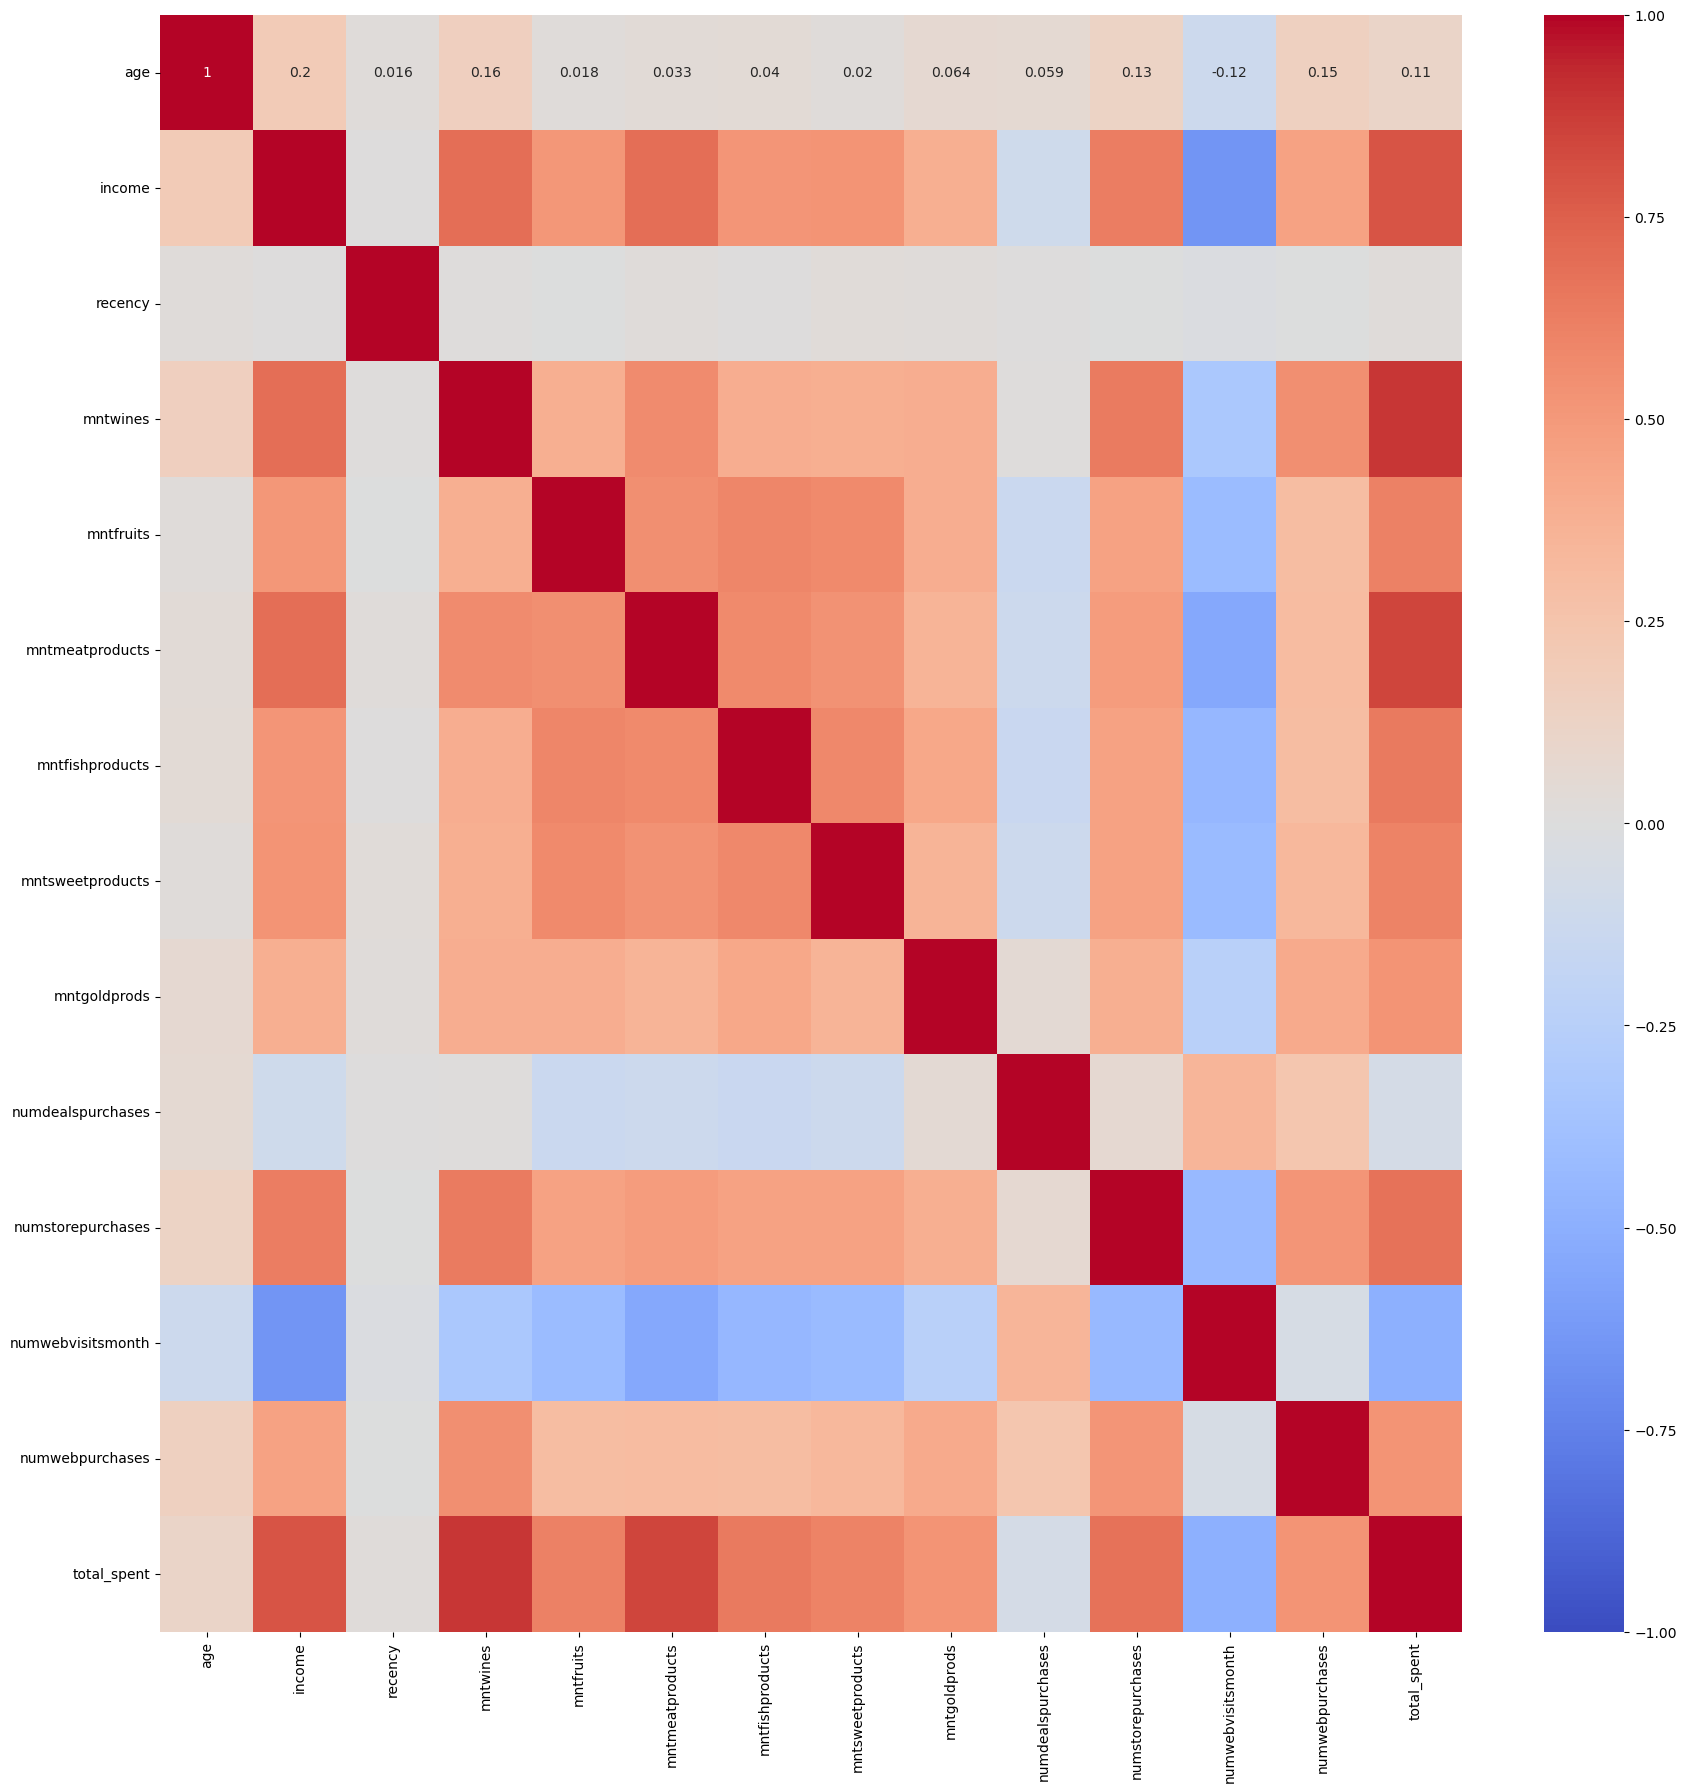

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(21,21))  
# sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(df[features].corr() ,annot=True, vmax=1, vmin=-1, cmap='coolwarm')


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
!pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   --------- ----------------------------- 71.7/282.6 kB 787.7 kB/s eta 0:00:01
   --------------------------------- ------ 235.5/282.6 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00


In [19]:
X = df[features]

pca = PCA(n_components=3)
pca.fit(X)
pca_features = pca.transform(X)

PCA_df = pd.DataFrame(pca_features, columns=(["PCA_X","PCA_Y", "PCA_Z"]))
PCA_df.describe()

PCA_X         PCA_Y         PCA_Z
count  2.215000e+03  2.215000e+03  2.215000e+03
mean  -2.995789e-12 -2.792128e-14 -1.642428e-15
std    2.153349e+04  4.328434e+02  1.792001e+02
min   -5.024104e+04 -2.430290e+03 -6.720998e+02
25%   -1.669601e+04 -2.301892e+02 -6.387471e+01
50%   -6.020362e+02  4.289935e+01  9.556722e+00
75%    1.653502e+04  2.632754e+02  5.540055e+01
max    1.103757e+05  3.406600e+03  1.582859e+03

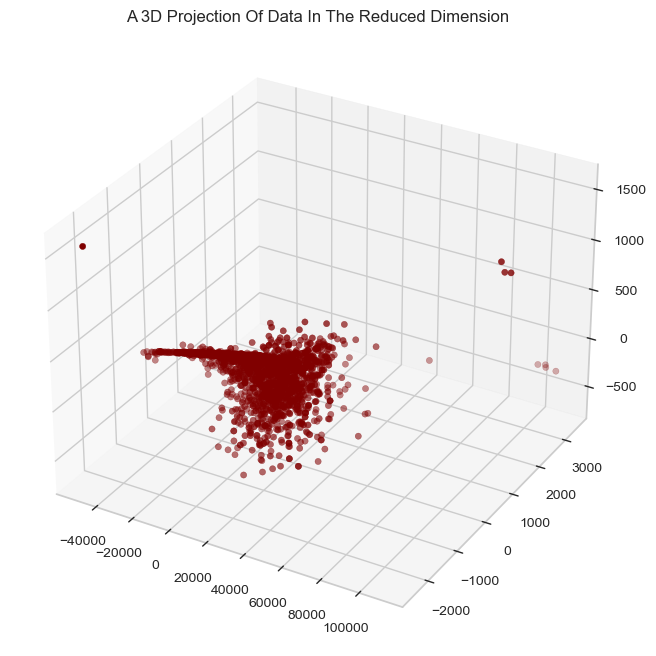

In [20]:
#To plot
x = PCA_df["PCA_X"]
y = PCA_df["PCA_Y"]
z = PCA_df["PCA_Z"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

c:\Users\yehtu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yehtu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\yehtu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yehtu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

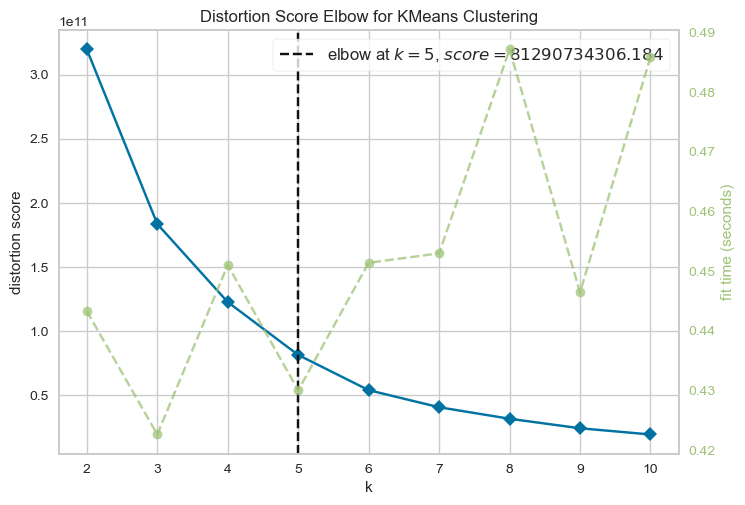

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

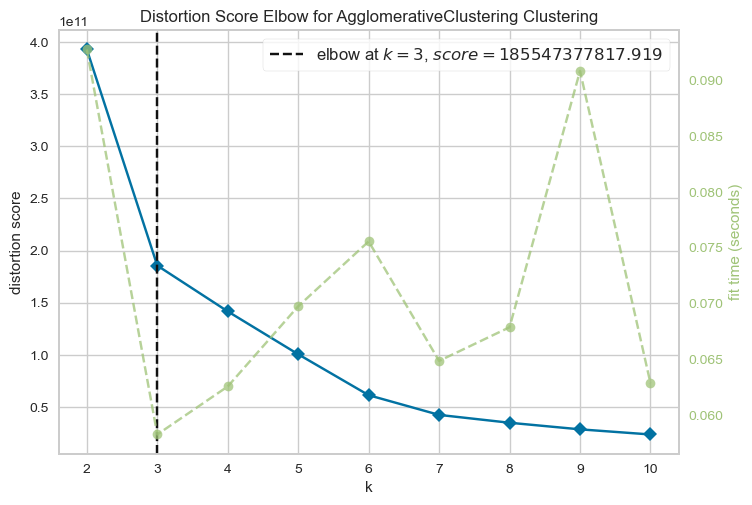

In [22]:
from sklearn.cluster import AgglomerativeClustering

Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["cluster"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["cluster"]= yhat_AC



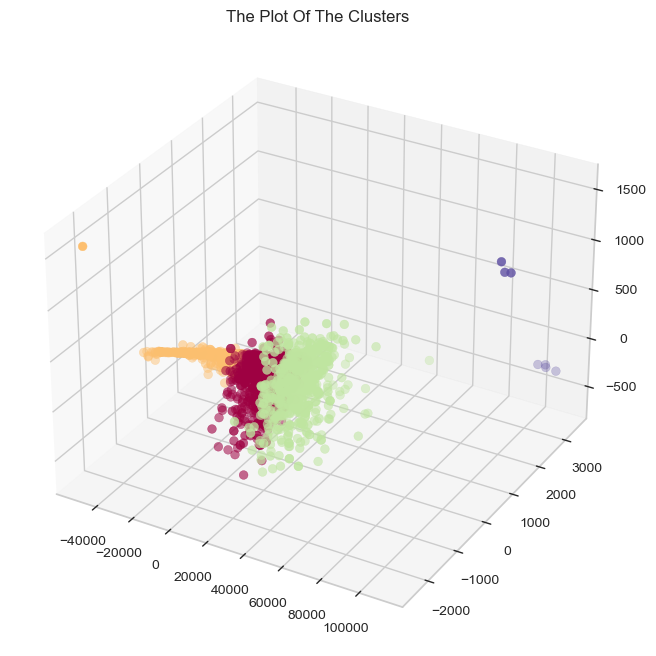

In [23]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["cluster"], marker='o', cmap='Spectral' )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [24]:
import plotly.express as px

fig = px.scatter_3d(PCA_df, 
                    x='PCA_X', 
                    y='PCA_Y', 
                    z='PCA_Z', 
                    color='cluster', 
                    size='cluster', 
                    size_max=10.1)

fig.show()

In [34]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X=PCA_df)
PCA_df['cluster'] = kmeans.predict(X=PCA_df)


c:\Users\yehtu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\yehtu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



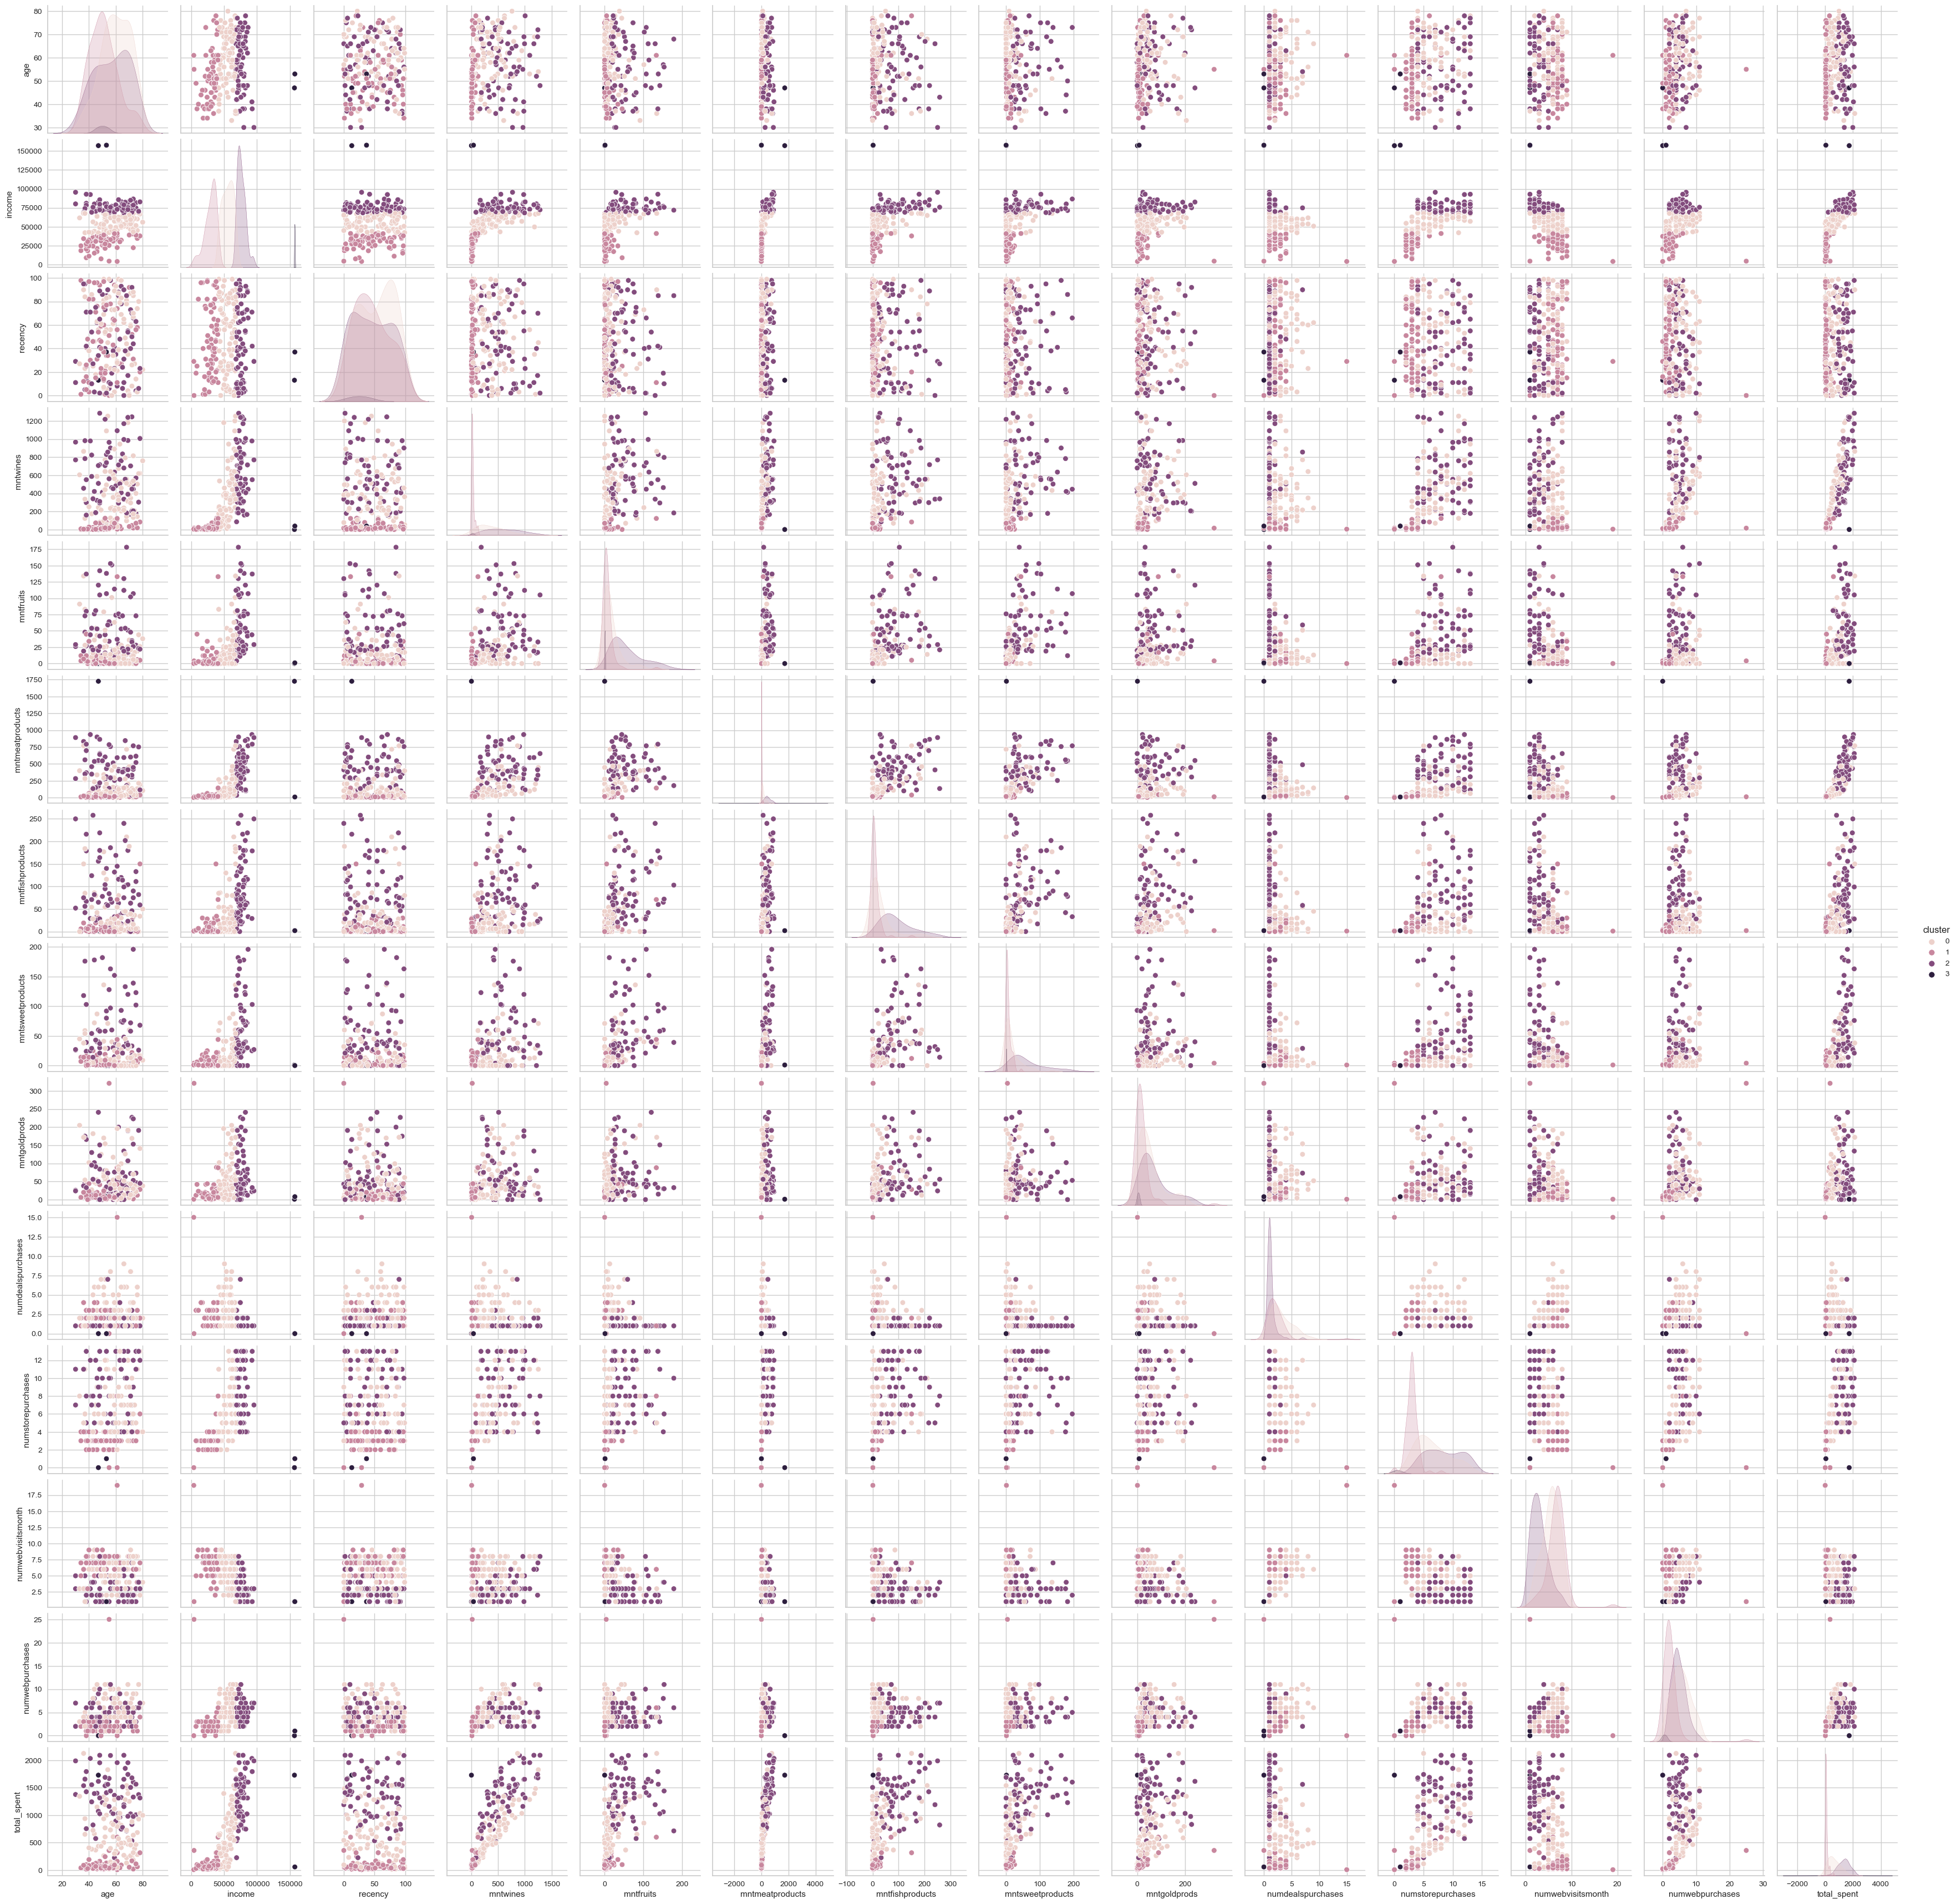

In [25]:
x = df.sample(frac=0.1)
sns.pairplot(x, vars=features, hue='cluster')

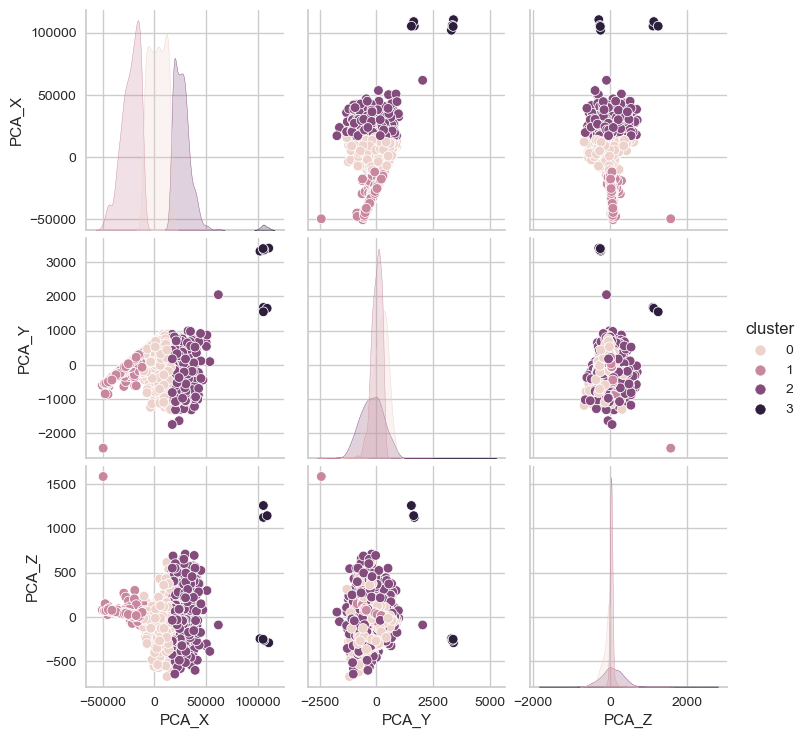

In [26]:
sns.pairplot(PCA_df, hue='cluster')

In [27]:
pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)

# df.groupby('Clusters')[features].agg([ 'count', 'mean', 'median', 'min','max', 'std']).round(2).style.format("{:,.0f}")

cluster_means = df.groupby('cluster')[features].mean()
print(df.cluster.value_counts())
cluster_means.T.style.format("{:,.0f}")

0    879
1    773
2    556
3      7
Name: cluster, dtype: int64


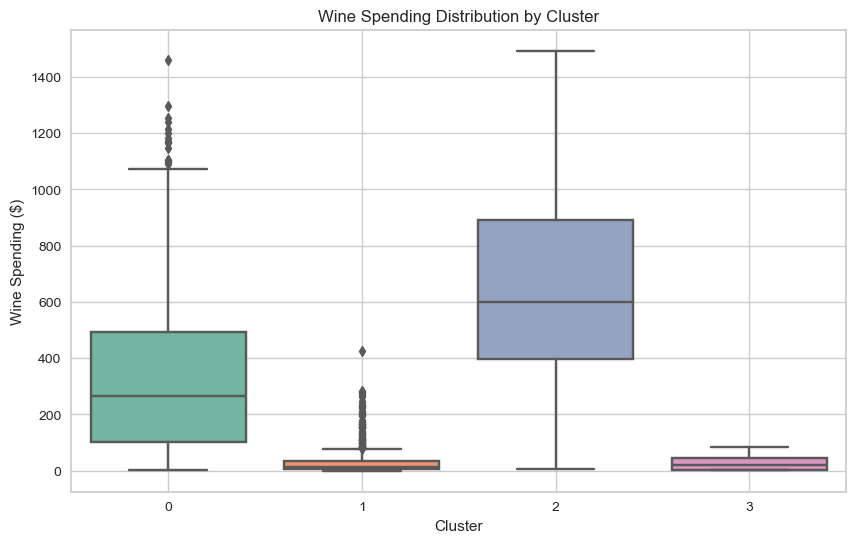

In [28]:
# Box plot for wine spending by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='mntwines', data=df, palette='Set2')
plt.title('Wine Spending Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Wine Spending ($)')
plt.grid(True)
plt.show()


In [29]:
df.head()

year_birth   education marital_status   income  kidhome  teenhome  recency  mntwines  mntfruits  mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  numdealspurchases  numwebpurchases  numcatalogpurchases  numstorepurchases  numwebvisitsmonth  acceptedcmp3  acceptedcmp4  acceptedcmp5  acceptedcmp1  acceptedcmp2  complain  z_costcontact  z_revenue  response  age  total_spent  cluster
0        1957  Graduation         Single  58138.0        0         0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1   67         1617        0
1        1954  Graduation         Single  46344.0        1         1       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0   70           27        0
2        1965  Graduation       Together  71613.0        0         0       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0   59          776        2
3        1984  Graduation       Together  26646.0        1         0       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0   40           53        1
4        1981         PhD        Married  58293.0        1         0       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0   43          422        0

In [30]:
# Display cluster characteristics by taking the mean of each feature for each cluster
cluster_summary = df.groupby('cluster')[features].mean()

# # Print the summary for stakeholders
for cluster in cluster_summary.index:
    print(f"\n### Cluster {cluster} Characteristics ###")
    
    # Extract the row for the current cluster
    cluster_data = cluster_summary.loc[cluster]

    raw_cluster_df = df[df.cluster == cluster]
    
    # Highlight key features for each cluster
    print(f"- Size of Cluster: {len(raw_cluster_df)}")

    print(f"- Average Income: ${cluster_data['income']:.2f}")
    print(f"- Average Age: {cluster_data['age']:.0f}")
    print(f"- Average spending on Wine: ${cluster_data['mntwines']:.2f}")
    print(f"- Average spending on Fruits: ${cluster_data['mntfruits']:.2f}")
    print(f"- Average spending on Meat: ${cluster_data['mntmeatproducts']:.2f}")
    print(f"- Average spending on Fish: ${cluster_data['mntfishproducts']:.2f}")
    print(f"- Average spending on Sweet Products: ${cluster_data['mntsweetproducts']:.2f}")
    print(f"- Average spending on Gold Products: ${cluster_data['mntgoldprods']:.2f}")



### Cluster 0 Characteristics ###
- Size of Cluster: 879
- Average Income: $54771.81
- Average Age: 58
- Average spending on Wine: $330.94
- Average spending on Fruits: $22.10
- Average spending on Meat: $119.50
- Average spending on Fish: $30.17
- Average spending on Sweet Products: $21.00
- Average spending on Gold Products: $48.59

### Cluster 1 Characteristics ###
- Size of Cluster: 773
- Average Income: $28862.37
- Average Age: 51
- Average spending on Wine: $33.22
- Average spending on Fruits: $6.09
- Average spending on Meat: $26.02
- Average spending on Fish: $9.29
- Average spending on Sweet Products: $6.19
- Average spending on Gold Products: $18.20

### Cluster 2 Characteristics ###
- Size of Cluster: 556
- Average Income: $78331.01
- Average Age: 56
- Average spending on Wine: $646.22
- Average spending on Fruits: $61.57
- Average spending on Meat: $431.52
- Average spending on Fish: $89.33
- Average spending on Sweet Products: $65.91
- Average spending on Gold Products: $

## STOPPING HERE, HOWEVER BELOW MORE
* please note that a below was aided by GPT4o 

In [31]:
df = pd.read_csv("data/marketing_campaign.csv",sep='\t')
df.head().T

0           1           2           3           4
ID                         5524        2174        4141        6182        5324
Year_Birth                 1957        1954        1965        1984        1981
Education            Graduation  Graduation  Graduation  Graduation         PhD
Marital_Status           Single      Single    Together    Together     Married
Income                  58138.0     46344.0     71613.0     26646.0     58293.0
Kidhome                       0           1           0           1           1
Teenhome                      0           1           0           0           0
Dt_Customer          04-09-2012  08-03-2014  21-08-2013  10-02-2014  19-01-2014
Recency                      58          38          26          26          94
MntWines                    635          11         426          11         173
MntFruits                    88           1          49           4          43
MntMeatProducts             546           6         127          20         118
MntFishProducts             172           2         111          10          46
MntSweetProducts             88           1          21           3          27
MntGoldProds                 88           6          42           5          15
NumDealsPurchases             3           2           1           2           5
NumWebPurchases               8           1           8           2           5
NumCatalogPurchases          10           1           2           0           3
NumStorePurchases             4           2          10           4           6
NumWebVisitsMonth             7           5           4           6           5
AcceptedCmp3                  0           0           0           0           0
AcceptedCmp4                  0           0           0           0           0
AcceptedCmp5                  0           0           0           0           0
AcceptedCmp1                  0           0           0           0           0
AcceptedCmp2                  0           0           0           0           0
Complain                      0           0           0           0           0
Z_CostContact                 3           3           3           3           3
Z_Revenue                    11          11          11          11          11
Response                      1           0           0           0           0

c:\Users\yehtu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\yehtu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



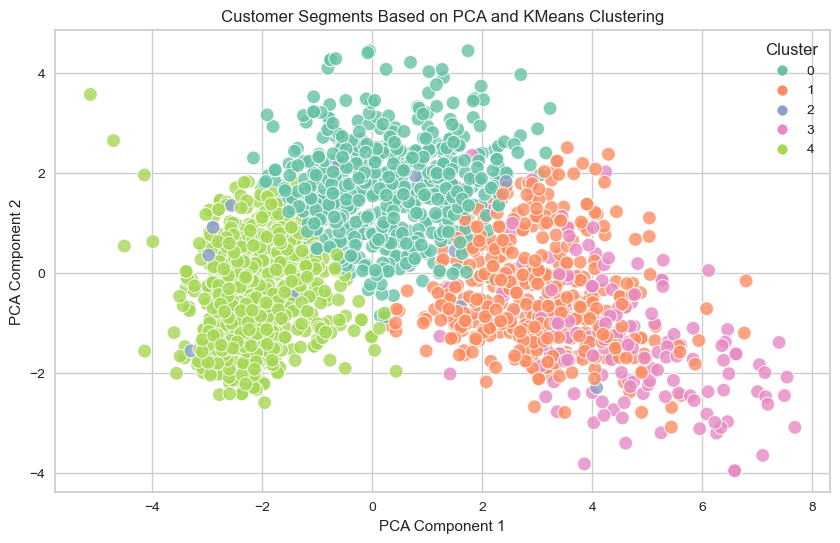

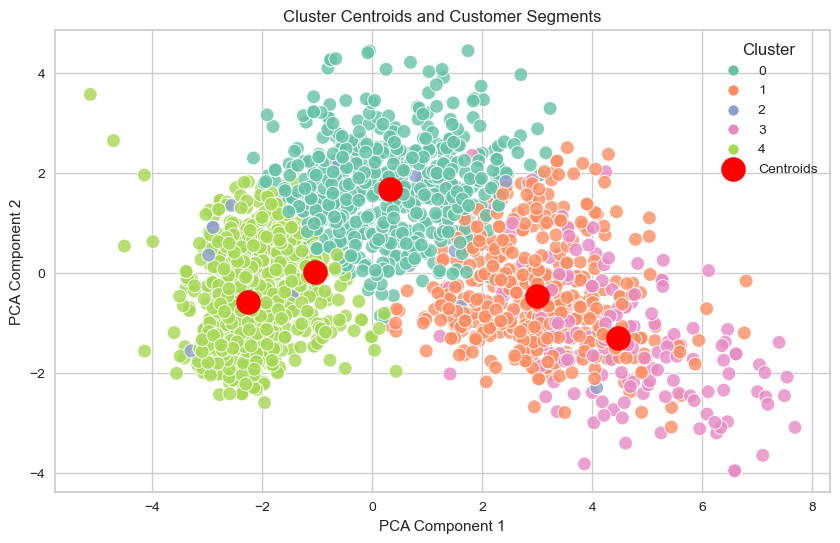

          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response
Cluster                                                                                                                                                                                                                                                                                                                                            
0        1964.313029  57273.681895  0.235195  0.940778  48.191201  449.791878  19.641286       127.341794        27.175973         20.367174     58.197970           3.774958         6.255499             2.957699           7.617597           5.791878      0.059222      0.135364      0.003384      0.028765      0.011844 

In [32]:

# Preprocessing: Drop irrelevant columns and handle missing data
df = df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Education', 'Marital_Status'])
df = df.dropna()

# Normalize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Use PCA for dimensionality reduction to 2D (for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])

# Visualization of clusters in 2D using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments Based on PCA and KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Visualize centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set2', s=100, alpha=0.8)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', label='Centroids')
plt.title('Cluster Centroids and Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Silhouette score for evaluating cluster quality
print(f"Silhouette Score: {silhouette_avg:.2f}")
